
# Probably and Statistics: Final Project
## Video Game Reviews, Sales, and Publisher Analytics - *What makes a good game?*
***

**Team:** 
Laura Pantleo; Jacob (Jake) Henson


***

This assignment is the notebook for our final project on video games. We are using data from https://corgis-edu.github.io/corgis/csv/video_games/ in order to get a look at metacritic score, console, publisher, and see how this all relates, as well as some basic probability analysis for fun. 

Through this notebook we will be exploring topics such as:
- What are the most popular genres for Nintendo/Ubisoft/EA/Activision/Sega/Ubisoft/Capcom/Etc4
- What are the most popular genres for each console?
- Does metacritic score have an effect on used price? 
- Does a game's ESRB rating affect its review score? 
- Does a game's length correspond to a higher Metacritic score?
- And many other questions!

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from collections import Counter
from matplotlib.ticker import MaxNLocator


## CSV File Introduction
*** 
Video games! They're a fun, creative, and stimulating hobby that allows for individuals to take a break from reality and immerse in fantasy worlds--but what makes a good video game? We'll be finding out here with a bit of statistics, analytics, and data sets. 

A bit of background: 

  - This data was collected via the CORGIS project from: https://corgis-edu.github.io/corgis/csv/video_games/
  - It relates to games released from 2004-2010, and consists of over 1000 individual video games. While the information itself may be a tad older, there is important things we can learn from it. 

Below is a sample of data we have from video games released between 2004 and 2010. We chose a dataset from these years because in the 12-16 years they have been out, many have cemented themselves in geek culture and have made or broken various producers and consoles. Additionally, it allows us to analyze more data such as resale value and see how many people have played the game over the years. 
The data contains information pertaining to Console, Publisher, Genre, Metacritic Review scores, resale price and story length among other things. 

In [93]:
filepath = 'video_gamesEdit1.csv'
df = pd.read_csv(filepath)
df.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,Racing / Driving,True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333




**Checking and Cleaning the Dataset**



In [94]:
file_path = 'video_gamesEdit1.csv'
dfDirtyGames = pd.read_csv(file_path)
dfDirtyGames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 36 columns):
Title                            1212 non-null object
Features.Handheld?               1212 non-null bool
Features.Max Players             1212 non-null int64
Features.Multiplatform?          1212 non-null bool
Features.Online?                 1212 non-null bool
Metadata.Genres                  1212 non-null object
Metadata.Licensed?               1212 non-null bool
Metadata.Publishers              948 non-null object
Metadata.Sequel?                 1212 non-null bool
Metrics.Review Score             1212 non-null int64
Metrics.Sales                    1212 non-null float64
Metrics.Used Price               1212 non-null float64
Release.Console                  1212 non-null object
Release.Rating                   1212 non-null object
Release.Re-release?              1212 non-null bool
Release.Year                     1212 non-null int64
Length.All PlayStyles.Average    1212 non-n

As you can see above, there are many games missing their info on Publishers. We only want the information for the 948 games with a complete data set, and so we are going to exclude the 264 games that do not include that information.



In [95]:
file_path = 'video_gamesEdit1.csv'
dfDirtyGames = pd.read_csv(file_path)
#dfDirtyGames.info()

dfCleanGames = dfDirtyGames.dropna(subset=["Metadata.Publishers"]).copy() #.to drop all rows with missing values in a subset of the columns, pass the subset parameter to .dropna() along with a list of column names of the subset
dfCleanGames.info() #To see the new "clean" data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 1205
Data columns (total 36 columns):
Title                            948 non-null object
Features.Handheld?               948 non-null bool
Features.Max Players             948 non-null int64
Features.Multiplatform?          948 non-null bool
Features.Online?                 948 non-null bool
Metadata.Genres                  948 non-null object
Metadata.Licensed?               948 non-null bool
Metadata.Publishers              948 non-null object
Metadata.Sequel?                 948 non-null bool
Metrics.Review Score             948 non-null int64
Metrics.Sales                    948 non-null float64
Metrics.Used Price               948 non-null float64
Release.Console                  948 non-null object
Release.Rating                   948 non-null object
Release.Re-release?              948 non-null bool
Release.Year                     948 non-null int64
Length.All PlayStyles.Average    948 non-null float64
Lengt

Now we have our new, clean dataset! Defined as dcCleanGames!



### **Examining the Relationship between Genres and Success**

Some consoles and publishers such as Nintendo have a stereotype of being for a younger or more family based audience while other consoles such as the PSP, PlayStation, and Xbox are thought to target more teen/adult audiences. Furthermore, genres such as Action and Horror tend to be more associated with older audiences.

Therefore, we thought it would be interesting to explore the relationship between genre and console to see if the stereotypes stand true. Later, we will address this data again to observe whether this has an effect on the success of the games selling and therefore the success of the game publishers and consoles.

Number of Genres: 9
Action                391
Sports                191
Racing / Driving      121
Role-Playing (RPG)     97
Strategy               74
Adventure              40
Simulation             30
Educational             3
Adventure,Strategy      1
Name: Metadata.Genres, dtype: int64


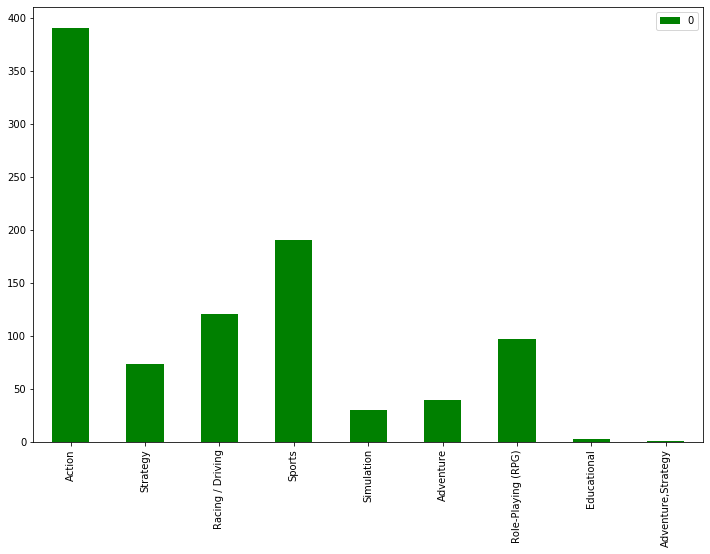

In [96]:
from collections import Counter

print("Number of Genres:", dfCleanGames["Metadata.Genres"].nunique())
print(dfCleanGames["Metadata.Genres"].value_counts())

l_counts = Counter(dfCleanGames["Metadata.Genres"])
dfPubs = pd.DataFrame.from_dict(l_counts, orient='index')
dfPubs.plot(kind='bar', figsize =(12,8), color="Green")

In [97]:
from collections import Counter

dfEA = dfCleanGames.loc[dfCleanGames["Metadata.Publishers"]=="EA"]
dfUbi = dfCleanGames.loc[dfCleanGames["Metadata.Publishers"]=="Ubisoft"]
dfActivision = dfCleanGames.loc[dfCleanGames["Metadata.Publishers"]=="Activision"]
dfNintendo = dfCleanGames.loc[dfCleanGames["Metadata.Publishers"]=="Nintendo"]
dfSega = dfCleanGames.loc[dfCleanGames["Metadata.Publishers"]=="Sega"]


print("___________________________________________________________________________")

print("Nintendo Total Number of Genres:", dfNintendo["Metadata.Genres"].nunique())
print(dfNintendo["Metadata.Genres"].value_counts())
print("___________________________________________________________________________")

print("EA Total Number of Genres:", dfEA["Metadata.Genres"].nunique())
print(dfEA["Metadata.Genres"].value_counts())
print("___________________________________________________________________________")

print("Ubisoft Total Number of Genres:", dfUbi["Metadata.Genres"].nunique())
print(dfUbi["Metadata.Genres"].value_counts())
print("___________________________________________________________________________")

print("Sega Total Number of Genres:", dfSega["Metadata.Genres"].nunique())
print(dfSega["Metadata.Genres"].value_counts())
print("___________________________________________________________________________")

print("Activision Total Number of Genres:", dfActivision["Metadata.Genres"].nunique())
print(dfActivision["Metadata.Genres"].value_counts())
print("___________________________________________________________________________")



___________________________________________________________________________
Nintendo Total Number of Genres: 7
Action                31
Strategy              17
Role-Playing (RPG)    16
Racing / Driving       8
Sports                 5
Simulation             5
Adventure              3
Name: Metadata.Genres, dtype: int64
___________________________________________________________________________
EA Total Number of Genres: 7
Sports                75
Action                39
Racing / Driving      28
Simulation            14
Strategy               5
Role-Playing (RPG)     3
Adventure              1
Name: Metadata.Genres, dtype: int64
___________________________________________________________________________
Ubisoft Total Number of Genres: 8
Action                50
Strategy              11
Racing / Driving      10
Sports                 7
Role-Playing (RPG)     7
Adventure              3
Educational            3
Simulation             1
Name: Metadata.Genres, dtype: int64
________________

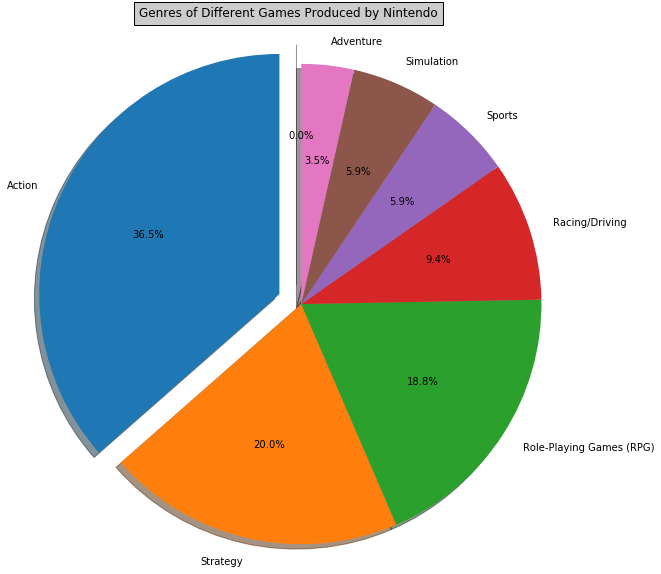

In [98]:
fig = plt.gcf()
fig.set_size_inches(10,10) # or (4,4) or (5,5) or whatever

dfNintendo = dfCleanGames.loc[dfCleanGames["Metadata.Publishers"]=="Nintendo"]
nintendo_counts = Counter(dfNintendo["Metadata.Genres"])

plt.title("Genres of Different Games Produced by Nintendo", bbox={'facecolor':'0.8', 'pad':5})
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Action', 'Strategy', 'Role-Playing Games (RPG)', 'Racing/Driving', 'Sports', 'Simulation', 'Adventure', 'Educational'
nintendoGenres = np.array([31,17,16,8,5,5,3,0])
explode = (0.1, 0, 0, 0, 0, 0, 0, 0.1)  # only "explode" largest and smallest

#fig1, ax1 = plt.subplots()
plt.pie(nintendoGenres, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

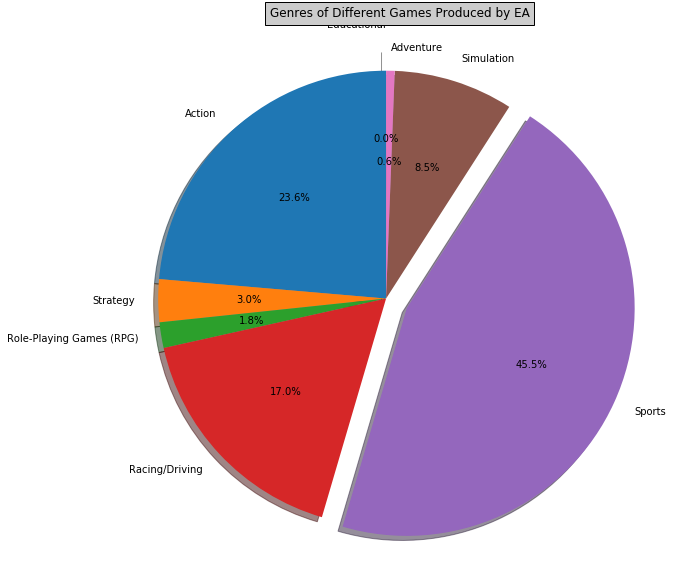

In [99]:
fig = plt.gcf()
fig.set_size_inches(10,10) # or (4,4) or (5,5) or whatever
dfEA = dfCleanGames.loc[dfCleanGames["Metadata.Publishers"]=="EA"]

#EA_counts = Counter(dfEA["Metadata.Genres"])
EAGenres = np.array([39,5,3,28,75,14,1,0])


plt.title("Genres of Different Games Produced by EA", bbox={'facecolor':'0.8', 'pad':5})
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Action', 'Strategy', 'Role-Playing Games (RPG)', 'Racing/Driving', 'Sports', 'Simulation', 'Adventure', 'Educational'
EAGenres = np.array([39,5,3,28,75,14,1,0])
explode = (0, 0, 0, 0, 0.1, 0, 0, 0.1)  # only "explode" the 2nd slice

#fig1, ax1 = plt.subplots()
plt.pie(EAGenres, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

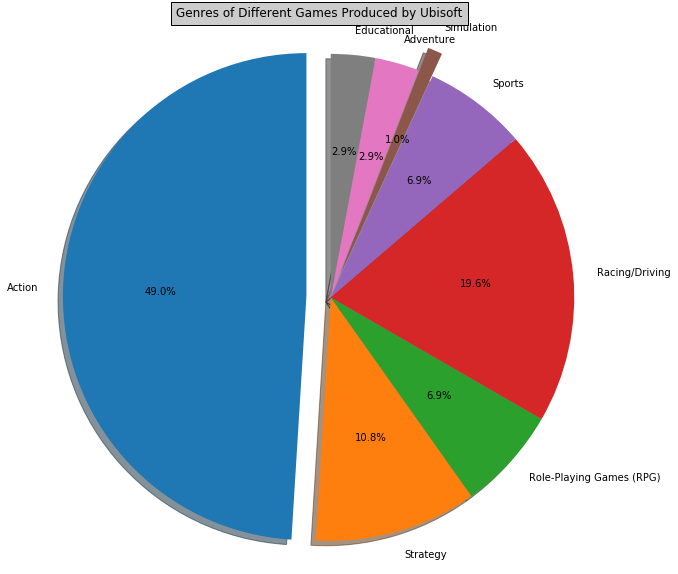

In [100]:
fig = plt.gcf()
fig.set_size_inches(10,10) # or (4,4) or (5,5) or whatever
dfUbi = dfCleanGames.loc[dfCleanGames["Metadata.Publishers"]=="Ubisoft"]

Ubi_counts = Counter(dfNintendo["Metadata.Genres"])

plt.title("Genres of Different Games Produced by Ubisoft", bbox={'facecolor':'0.8', 'pad':5})
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Action', 'Strategy', 'Role-Playing Games (RPG)', 'Racing/Driving', 'Sports', 'Simulation', 'Adventure', 'Educational'
UbiGenres = np.array([50,11,7,20,7,1,3,3])
explode = (0.1, 0, 0, 0, 0, 0.1, 0, 0)  # explode the larges and smallest slices

plt.pie(UbiGenres, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

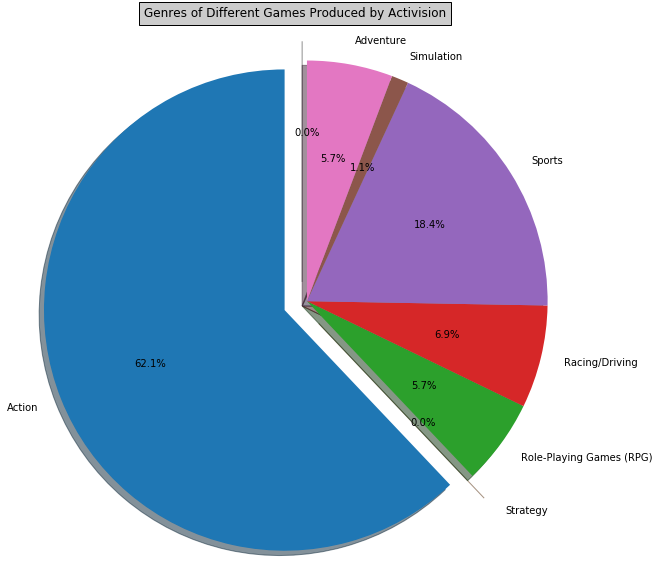

In [101]:
fig = plt.gcf()
fig.set_size_inches(10,10) # or (4,4) or (5,5) or whatever

dfActivision = dfCleanGames.loc[dfCleanGames["Metadata.Publishers"]=="Activision"]

acti_counts = Counter(dfActivision["Metadata.Genres"])

plt.title("Genres of Different Games Produced by Activision", bbox={'facecolor':'0.8', 'pad':5})
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Action', 'Strategy', 'Role-Playing Games (RPG)', 'Racing/Driving', 'Sports', 'Simulation', 'Adventure', 'Educational'
ActivisionGenres = np.array([54,0,5,6,16,1,5,0])
explode = (0.1, 0.1, 0, 0, 0, 0, 0, 0.1)  # explode the largest and smallest 

#fig1, ax1 = plt.subplots()
plt.pie(ActivisionGenres, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

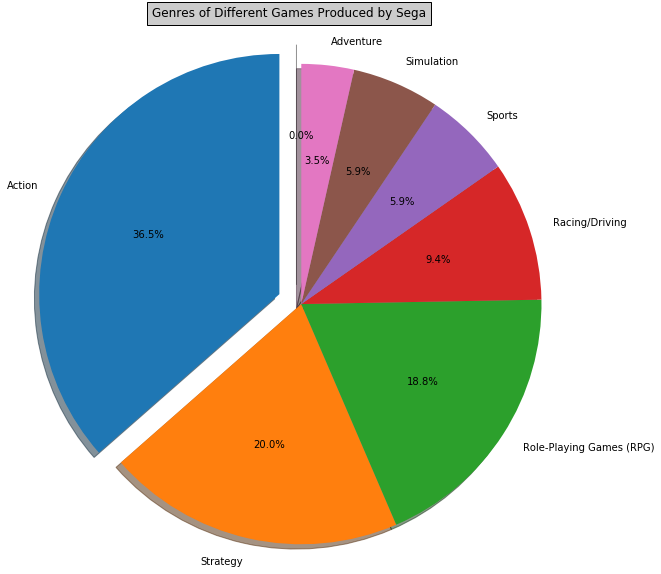

In [102]:
fig = plt.gcf()
fig.set_size_inches(10,10) # or (4,4) or (5,5) or whatever

dfSega = dfCleanGames.loc[dfCleanGames["Metadata.Publishers"]=="Sega"]

sega_counts = Counter(dfSega["Metadata.Genres"])

SegaGenres = np.array([38,2,4,12,11,2,6,0])


plt.title("Genres of Different Games Produced by Sega", bbox={'facecolor':'0.8', 'pad':5})
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Action', 'Strategy', 'Role-Playing Games (RPG)', 'Racing/Driving', 'Sports', 'Simulation', 'Adventure', 'Educational'
SegaGenres = np.array([31,17,16,8,5,5,3,0])
explode = (0.1, 0, 0, 0, 0, 0, 0, 0.1)  # only "explode" the 2nd slice

#fig1, ax1 = plt.subplots()
plt.pie(SegaGenres, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

When it comes to observing the relationship between popular producers and the genres they most commonly produce there are some interesting findings to note.
- First of all, for all producers except for EA, Action is the most produced genre by each company. On the other hand, EA's most popular genre produced is Sports while Action is the second most popular. 

- The most common genre across all producers is Action. Next is Sports, then Racing/Driving, Role-Playing Games (RPG), Strategy, Adventure, Simulation, and finally, Education. 

- Action may be the most popular genre as it is fairly broad and many different subjects and storylines may be applied to fit the genre. 

In the above section, we explored how popular different genres were for different producers, but below we will now compare genre to console type. 


In [103]:
from collections import Counter

dfNintendoDS = dfCleanGames.loc[dfCleanGames["Release.Console"]=="Nintendo DS"]
dfSonyPSP = dfCleanGames.loc[dfCleanGames["Release.Console"]=="Sony PSP"]
dfXbox = dfCleanGames.loc[dfCleanGames["Release.Console"]=="X360"]
dfWii = dfCleanGames.loc[dfCleanGames["Release.Console"]=="Nintendo Wii"]
dfPS = dfCleanGames.loc[dfCleanGames["Release.Console"]=="PlayStation 3"]

print("___________________________________________________________________________")

print("Nintendo DS Total Number of Genres:", dfNintendoDS["Metadata.Genres"].nunique())
print(dfNintendoDS["Metadata.Genres"].value_counts())

print("___________________________________________________________________________")

print("Nintendo Wii Total Number of Genres:", dfWii["Metadata.Genres"].nunique())
print(dfSega["Metadata.Genres"].value_counts())
print("___________________________________________________________________________")

print("Sony PSP Total Number of Genres:", dfSonyPSP["Metadata.Genres"].nunique())
print(dfEA["Metadata.Genres"].value_counts())
print("___________________________________________________________________________")

print("Xbox 360 Total Number of Genres:", dfXbox["Metadata.Genres"].nunique())
print(dfUbi["Metadata.Genres"].value_counts())
print("___________________________________________________________________________")

print("PlayStation 3 Total Number of Genres:", dfPS["Metadata.Genres"].nunique())
print(dfActivision["Metadata.Genres"].value_counts())
print("___________________________________________________________________________")



___________________________________________________________________________
Nintendo DS Total Number of Genres: 9
Action                80
Role-Playing (RPG)    45
Strategy              33
Racing / Driving      22
Adventure             19
Simulation            14
Sports                11
Educational            2
Adventure,Strategy     1
Name: Metadata.Genres, dtype: int64
___________________________________________________________________________
Nintendo Wii Total Number of Genres: 7
Action                38
Racing / Driving      12
Sports                11
Adventure              6
Role-Playing (RPG)     4
Strategy               2
Simulation             2
Name: Metadata.Genres, dtype: int64
___________________________________________________________________________
Sony PSP Total Number of Genres: 8
Sports                75
Action                39
Racing / Driving      28
Simulation            14
Strategy               5
Role-Playing (RPG)     3
Adventure              1
Name: Metadat

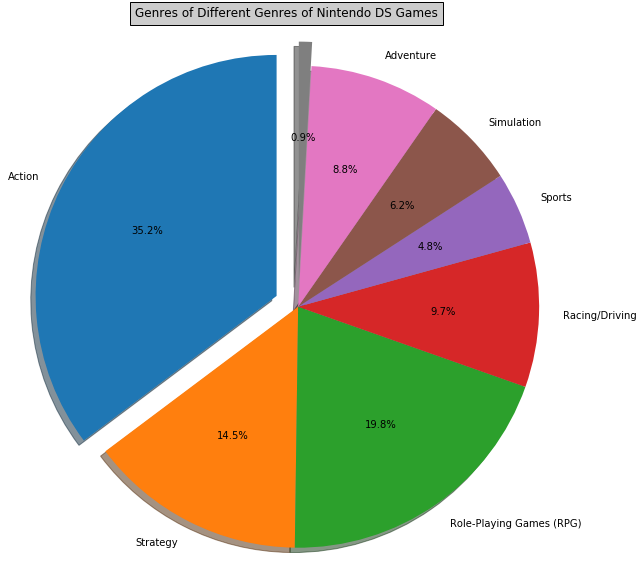

In [104]:

dfNintendoDS = dfCleanGames.loc[dfCleanGames["Release.Console"]=="Nintendo DS"]

fig = plt.gcf()
fig.set_size_inches(10,10) # or (4,4) or (5,5) or whatever

dfNintendoDS = dfCleanGames.loc[dfCleanGames["Release.Console"]=="Nintendo DS"]

DS_counts = Counter(dfNintendoDS["Metadata.Genres"])

plt.title("Genres of Different Genres of Nintendo DS Games", bbox={'facecolor':'0.8', 'pad':5})
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Action', 'Strategy', 'Role-Playing Games (RPG)', 'Racing/Driving', 'Sports', 'Simulation', 'Adventure', 'Educational'
DS_Genres = np.array([80,33,45,22,11,14,20,2])
explode = (0.1, 0, 0, 0, 0, 0, 0, 0.1)  # only "explode" largest and smallest

#fig1, ax1 = plt.subplots()
plt.pie(DS_Genres, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

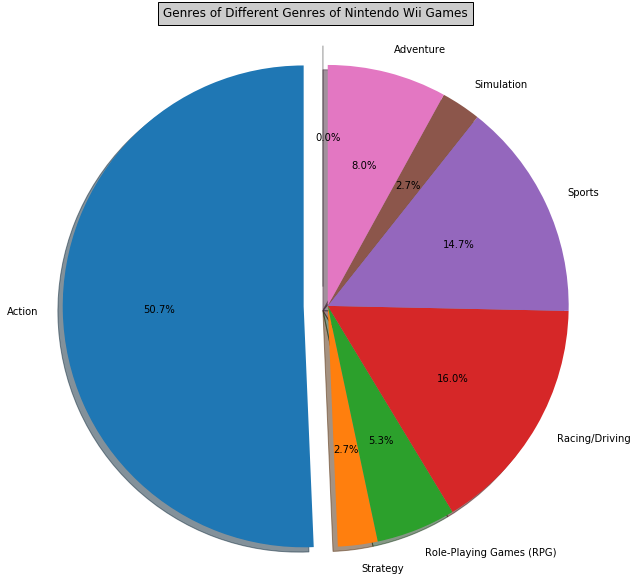

In [105]:
fig = plt.gcf()
fig.set_size_inches(10,10) # or (4,4) or (5,5) or whatever

dfWii = dfCleanGames.loc[dfCleanGames["Release.Console"]=="Nintendo Wii"]

wii_counts = Counter(dfWii["Metadata.Genres"])

wii_Genres = np.array([38,2,4,12,11,2,6,0])


plt.title("Genres of Different Genres of Nintendo Wii Games", bbox={'facecolor':'0.8', 'pad':5})
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Action', 'Strategy', 'Role-Playing Games (RPG)', 'Racing/Driving', 'Sports', 'Simulation', 'Adventure', 'Educational'

explode = (0.1, 0, 0, 0, 0, 0, 0, 0.1)  # only "explode" largest and smallest

#fig1, ax1 = plt.subplots()
plt.pie(wii_Genres, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

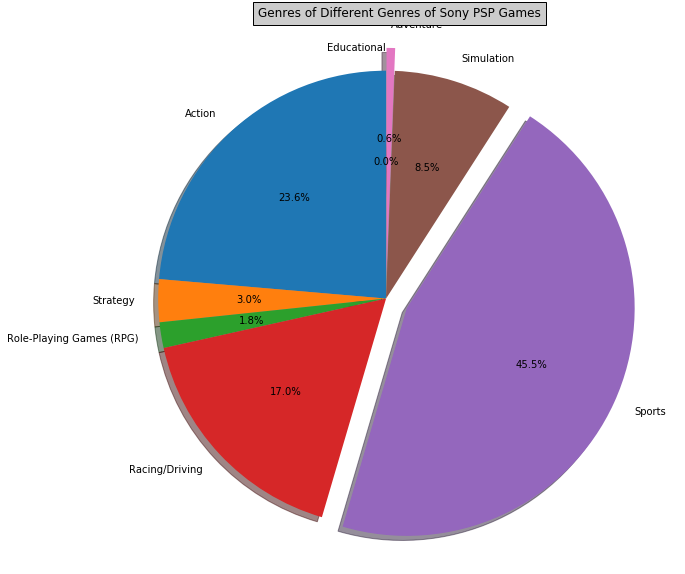

In [106]:
fig = plt.gcf()
fig.set_size_inches(10,10) # or (4,4) or (5,5) or whatever

dfSonyPSP = dfCleanGames.loc[dfCleanGames["Release.Console"]=="Sony PSP"]
psp_counts = Counter(dfSonyPSP["Metadata.Genres"])

plt.title("Genres of Different Genres of Sony PSP Games", bbox={'facecolor':'0.8', 'pad':5})
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Action', 'Strategy', 'Role-Playing Games (RPG)', 'Racing/Driving', 'Sports', 'Simulation', 'Adventure', 'Educational'
psp_Genres = np.array([39,5,3,28,75,14,1,0])
explode = (0, 0, 0, 0, 0.1, 0, 0.1, 0)  # only "explode" largest and smallest

#fig1, ax1 = plt.subplots()
plt.pie(psp_Genres, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

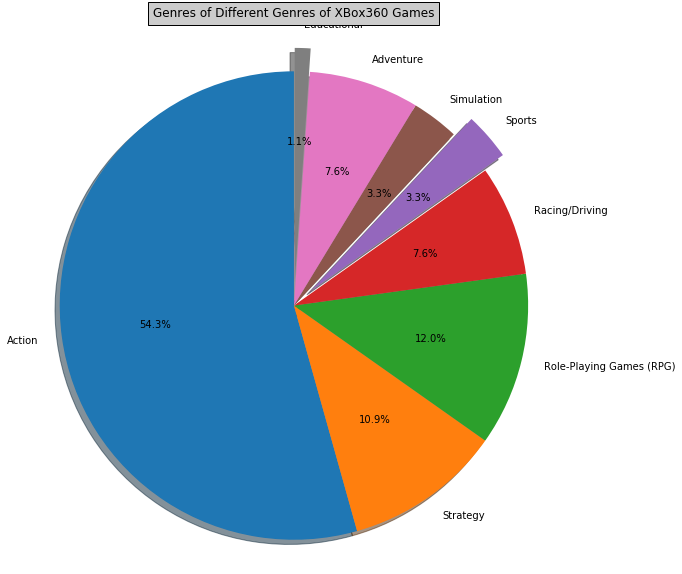

In [107]:
fig = plt.gcf()
fig.set_size_inches(10,10) # or (4,4) or (5,5) or whatever

dfXbox = dfCleanGames.loc[dfCleanGames["Release.Console"]=="X360"]
xbox_counts = Counter(dfXbox["Metadata.Genres"])

plt.title("Genres of Different Genres of XBox360 Games", bbox={'facecolor':'0.8', 'pad':5})
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Action', 'Strategy', 'Role-Playing Games (RPG)', 'Racing/Driving', 'Sports', 'Simulation', 'Adventure', 'Educational'
xbox_Genres = np.array([50,10,11,7,3,3,7,1])
explode = (0, 0, 0, 0, 0.1, 0, 0, 0.1)  # only "explode" largest and smallest

#fig1, ax1 = plt.subplots()
plt.pie(xbox_Genres, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

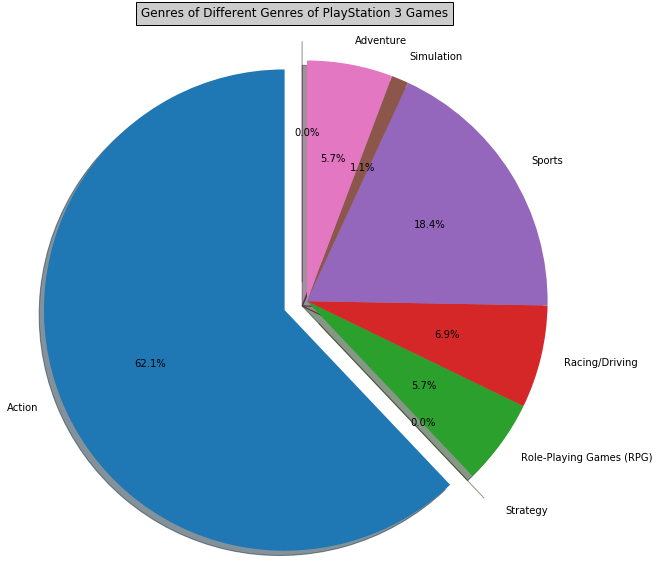

In [108]:
fig = plt.gcf()
fig.set_size_inches(10,10) # or (4,4) or (5,5) or whatever

dfPS = dfCleanGames.loc[dfCleanGames["Release.Console"]=="PlayStation 3"]
ps_counts = Counter(dfPS["Metadata.Genres"])

plt.title("Genres of Different Genres of PlayStation 3 Games", bbox={'facecolor':'0.8', 'pad':5})
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Action', 'Strategy', 'Role-Playing Games (RPG)', 'Racing/Driving', 'Sports', 'Simulation', 'Adventure', 'Educational'
ps_Genres = np.array([54,0,5,6,16,1,5,0])
explode = (0.1, 0.1, 0, 0, 0, 0, 0, 0.1)  # only "explode" largest and smallest

#fig1, ax1 = plt.subplots()
plt.pie(ps_Genres, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

As one can see, like with the publishers, "Action" is the most popular genre for almost every console. However, the Sony PSP is an outlier with about 45.5% of the games they produced between 2004 and 2008 being Sports themed games. From this data, we can make some inferences regarding console and sterotype of the company that may explain how and why the popularity of the different genres are dispersed the way that they are. 

- First of all, it is important to note that "Action" may be so popular of a genre becuase of how broad and all-encompasing it is. 

- In regards to Nintendo, it's reputation of being a family-gaming console may explain some of the genre diversity we see. "Action" is super popular, however, many of the most popular games Nintendo is known for falls under this category. However, sport games aren't generally the first thing that comes to mind when talking about Nintendo. The Racing / Driving games may also be somewhat more possible as racing games can be multiplayer (to race against friends and family) and can be easily adapted to less mature audiences--which fits into Nintendo's Reputation for being more of a Family-based company. 

- In regards to the Nintendo DS specifically, it is a smaller, hand-held console so maybe adapting sports games to the small screen may be difficult therefore making it less popular of a genre. The DS also saw a greater amount of released Strategy and RPG games than some of the other consoles. This may have to do with RPG and Strategy games being closely related in themes, and both but espescially with RPG's gaving more of a storyline to role-play through. RPG's tend to be like exploring a story. Therefore, this may also appeal to a younger audience more, cementing its reputation of being a family console.

- When examining the Nintendo Wii, it seems to have less games produced (which makes sense seeing as it was released in 2006, halfway through the years this dataset was collected) but of the data on games and their genre was recorded, it also seems to feed into the stereotype. However, maybe due to being able to be connected to the TV and having a larger screen, there is an increase in Racing / Driving games, and a larger portion of games that were released are sports games. 

- One thing that was surprising was how much more popular Sports-genre'd games were on the Sony PSP. Seeing as the PSP is similar to the Nintendo DS as they are both hand-held consoles, it wouldn't be surprising if they had similar genres. However, Sony is known for targetting older audiences and being less of a family-game producer than Nintendo so maybe producing more Sports games was meant to attract older audiences. 

- The Xbox 360's majority was also Action games and had the second largest percentage of Strategy games released. The Xbox 360's stereotype is similar to that of the Sony consoles' being that it's audience is stereotypically older (teen/young adult) than Nintendo's. 

- Finally, The PlayStation 3 also has a stereotype of being for an older (teen/young adult), however, one thing that was surprising was how the PS3 released the least strategy and simulation games, but like the PSP had more Sports genred games than other consoles.



### Review Scores and Games Analysis
___

**Examining the reviews and factors around a game's overall perception, regardless of console or genre**


#### **Question:**  *Do certain game publishers produce games which are higher reviewed than others?* 

Given that game developers and publishers have a wide variety of perceptions from various people, as well as different teams working on games, it leaves us to wonder what the relationship between publishers and ratings are. Are there any publishers with an outstanding amount of positive or negative ratings? Or are their games pretty evenly distributed accross the board? Do certain publishers have a better understanding of what makes a good game? 


To answer this, it's important ot first get a sense for how many publishers there are, and how many have each game. This way we're not getting a skewed look at publisher data. I'll begin by plotting a frequency histogram of number of games vs. publisher 

Number of publishers: 31
EA                      165
Ubisoft                  92
Activision               87
Nintendo                 85
Sega                     75
THQ                      61
Sony                     60
2K                       49
Konami                   47
Capcom                   35
Namco                    33
SquareEnix               31
Midway                   23
Eidos                    22
Microsoft                21
Atari                    20
Rockstar                 12
Disney                   10
Atari,Namco               4
EA,Namco                  2
Namco,Sony                2
Nintendo,Sega             2
Sony,Ubisoft              2
Activision,Sony           1
Capcom,Rockstar           1
Activision,Konami         1
Microsoft,SquareEnix      1
Namco,Ubisoft             1
EA,Sony                   1
Nintendo,SquareEnix       1
Capcom,Nintendo           1
Name: Metadata.Publishers, dtype: int64


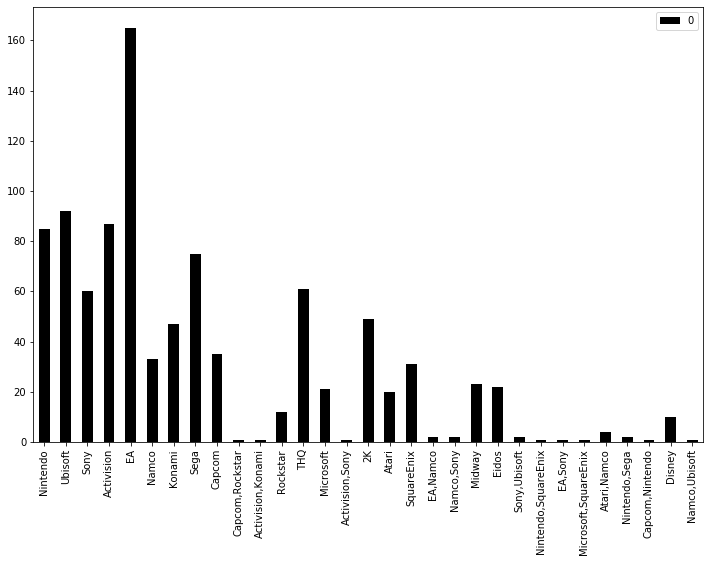

In [109]:
from collections import Counter

print("Number of publishers:", dfCleanGames["Metadata.Publishers"].nunique())
print(dfCleanGames["Metadata.Publishers"].value_counts())

letter_counts = Counter(dfCleanGames["Metadata.Publishers"])
dfPubs = pd.DataFrame.from_dict(letter_counts, orient='index')
dfPubs.plot(kind='bar', figsize =(12,8), color="black")

As we can see, there's quite a lot of variance in how many games each publisher has made. For the time being, *I'll restrict the density histogram to just the TOP 5 publishers* (EA, Ubisoft, Activision, Nintendo, and Sega) for the time being. This is to ensure a more even look at publisher trends overall and provide more readable results for the time being.

 - **Important to note - Despite the fact that there are several instances of multiple overlapping publishers listed under one game, we won't be considering these games for the below distribution. This is to get a more fair and balanced look*

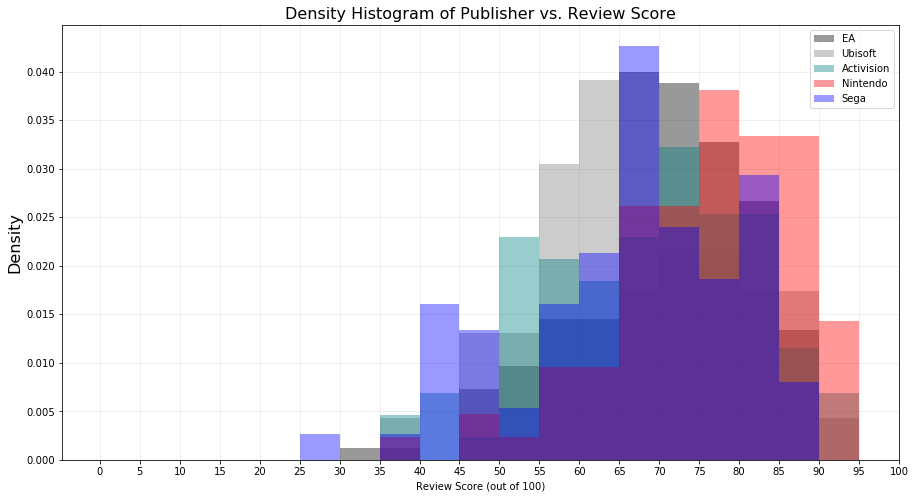

In [131]:
fig, ax = plt.subplots(figsize=(15,8))

dfEA = dfCleanGames.loc[dfCleanGames["Metadata.Publishers"]=="EA"]
dfUbi = dfCleanGames.loc[dfCleanGames["Metadata.Publishers"]=="Ubisoft"]
dfActivision = dfCleanGames.loc[dfCleanGames["Metadata.Publishers"]=="Activision"]
dfNintendo = dfCleanGames.loc[dfCleanGames["Metadata.Publishers"]=="Nintendo"]
dfSega = dfCleanGames.loc[dfCleanGames["Metadata.Publishers"]=="Sega"]


my_bins = range(0,100,5)

dfEA.hist(column="Metrics.Review Score", histtype='bar', ax=ax, facecolor="black", width = barwidth, bins=my_bins, label="EA", density=True, alpha=0.4)
dfUbi.hist(column="Metrics.Review Score", histtype='bar', ax=ax, facecolor="gray", width = barwidth, bins=my_bins, label="Ubisoft", density=True, alpha=0.4)
dfActivision.hist(column="Metrics.Review Score", histtype='bar', ax=ax, facecolor="teal", width = barwidth, bins=my_bins, label="Activision", density=True, alpha=0.4)
dfNintendo.hist(column="Metrics.Review Score", histtype='bar', ax=ax, facecolor="red", width = barwidth, bins=my_bins, label="Nintendo", density=True, alpha=0.4)
dfSega.hist(column="Metrics.Review Score", histtype='bar', ax=ax, facecolor="blue", width = barwidth, bins=my_bins, label="Sega", density=True, alpha=0.4)


ax.set_title("Density Histogram of Publisher vs. Review Score", fontsize=16)

ax.set_xlabel("Review Score (out of 100)")
ax.set_ylabel("Density", fontsize=16)


plt.xticks(np.arange(0, 100 + 5, 5)) #put ticks in y-axis to see more 


ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend()

plt.show()

This is a little dense, so I'll go ahead and plot them as separate histograms too to get a better idea of the shape:

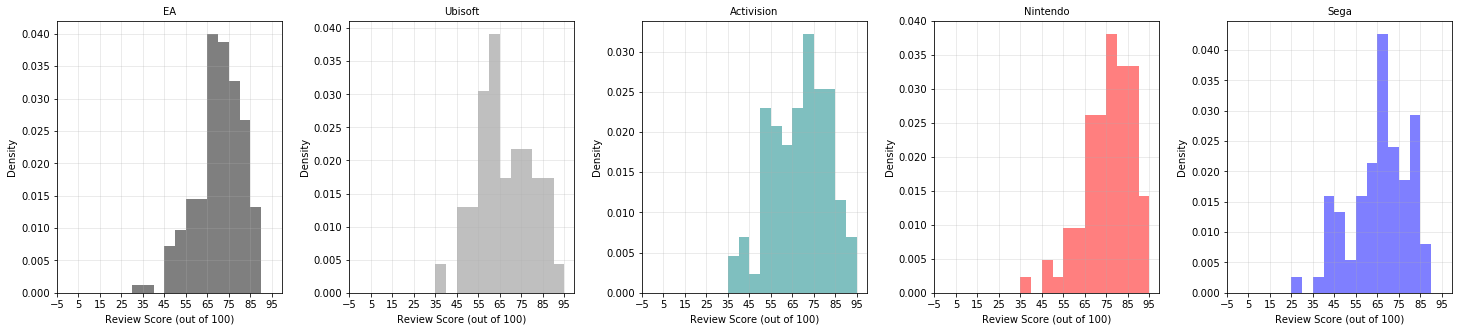

In [132]:
fig, axes = plt.subplots(1, 5, figsize=(25,5))


dfEA.hist(column="Metrics.Review Score", histtype='bar', facecolor="black",  bins=my_bins, label="EA", density=True, ax=axes[0], alpha=0.5)
dfUbi.hist(column="Metrics.Review Score", histtype='bar', facecolor="gray",bins=my_bins, label="Ubisoft", density=True,  ax=axes[1], alpha=0.5)
dfActivision.hist(column="Metrics.Review Score", histtype='bar', facecolor="teal", bins=my_bins, label="Activision", density=True,  ax=axes[2], alpha=0.5)
dfNintendo.hist(column="Metrics.Review Score", histtype='bar', facecolor="red", bins=my_bins, label="Nintendo", density=True,  ax=axes[3], alpha=0.5)
dfSega.hist(column="Metrics.Review Score", histtype='bar', facecolor="blue", bins=my_bins, label="Sega", density=True,  ax=axes[4], alpha=0.5)

axes[0].set_title("EA",fontsize=10)
axes[1].set_title("Ubisoft",fontsize=10)
axes[2].set_title("Activision",fontsize=10)
axes[3].set_title("Nintendo",fontsize=10)
axes[4].set_title("Sega",fontsize=10)

#set up ticks for all axes: 
for i in range(len(axes)):
    axes[i].set_xlabel("Review Score (out of 100)")
    axes[i].set_ylabel("Density")
    axes[i].grid(alpha=0.3) #ticks are being weird, so i'm turning off the grid entirely 
    axes[i].set_xticks(np.arange(-5,100,10))

In [130]:
print("EA:")
print("  - Min Review Score: ", round(dfEA["Metrics.Review Score"].min(), 1))
print("  - Mean Review Score: ", round(dfEA["Metrics.Review Score"].mean(), 1))
print("  - Max Review Score: ", round(dfEA["Metrics.Review Score"].max(), 1))
print("  - Std Deviation: ", round(dfEA["Metrics.Review Score"].std(), 1))
print("\n")

print("Ubisoft:")
print("  - Min Review Score: ", round(dfUbi["Metrics.Review Score"].min(), 1))
print("  - Mean Review Score: ", round(dfUbi["Metrics.Review Score"].mean(), 1))
print("  - Max Review Score: ", round(dfUbi["Metrics.Review Score"].max(), 1))
print("  - Std Deviation: ", round(dfUbi["Metrics.Review Score"].std(), 1))
print("\n")

print("Activision:")
print("  - Min Review Score: ", round(dfActivision["Metrics.Review Score"].min(), 1))
print("  - Mean Review Score: ", round(dfActivision["Metrics.Review Score"].mean(), 1))
print("  - Max Review Score: ", round(dfActivision["Metrics.Review Score"].max(), 1))
print("  - Std Deviation: ", round(dfActivision["Metrics.Review Score"].std(), 1))
print("\n")

print("Nintendo:")
print("  - Min Review Score: ", round(dfNintendo["Metrics.Review Score"].min(), 1))
print("  - Mean Review Score: ", round(dfNintendo["Metrics.Review Score"].mean(), 1))
print("  - Max Review Score: ", round(dfNintendo["Metrics.Review Score"].max(), 1))
print("  - Std Deviation: ", round(dfNintendo["Metrics.Review Score"].std(), 1))
print("\n")

print("Sega:")
print("  - Min Review Score: ", round(dfSega["Metrics.Review Score"].min(), 1))
print("  - Mean Review Score: ", round(dfSega["Metrics.Review Score"].mean(), 1))
print("  - Max Review Score: ", round(dfSega["Metrics.Review Score"].max(), 1))
print("  - Std Deviation: ", round(dfSega["Metrics.Review Score"].std(), 1))
print("\n")



EA:
  - Min Review Score:  34
  - Mean Review Score:  70.2
  - Max Review Score:  88
  - Std Deviation:  10.5


Ubisoft:
  - Min Review Score:  38
  - Mean Review Score:  66.8
  - Max Review Score:  93
  - Std Deviation:  12.4


Activision:
  - Min Review Score:  37
  - Mean Review Score:  67.8
  - Max Review Score:  94
  - Std Deviation:  13.2


Nintendo:
  - Min Review Score:  37
  - Mean Review Score:  75.7
  - Max Review Score:  97
  - Std Deviation:  11.2


Sega:
  - Min Review Score:  28
  - Mean Review Score:  65.3
  - Max Review Score:  89
  - Std Deviation:  13.8




Wow! Interesting findings from the above data, notably in the different shapes within the bell curves and means.  
- It looks like Nintendo seems to have the highest distribution of positive scores over 70+, It also has the highest scored game of these publishers (at 97) and the highest average score, 75

- Both Activision and Nintendo have a higher distribution of games within the 70+ range than most other publishers

- Generally speaking, the publisher with the lowest scores from the distribution to be SEGA, who have consistently lower scores in the distribution histogram, as well as the minimum review score at 28. They also have the lowest mean review score at 65.3. Interestingly, they also have the highest standard deviation at 13.8


So to answer the original question, it appears that Nintendo seem to have the highest general distribution of review scores comparitively, and SEGA has the lowest scores (although highest standard deviation). 
Again, this data is not entirely indicative of these publishers' respective quality, however it is very interesting to note that some publishers seem to produce consitently higher-ranked games than others.
**Note again that this *only* included the top 5 most prolific game publishers for this list, and is not the full scope of who is the best publisher by any means.** 

#### **Question:**  *Does review score have an effect on used price?* 
 
It makes sense initially that a game's review score would affect its initial sales, but what about used price? After people have already played a game and want to sell it, would the second-hand market be affected by negative reviews? 
In order to properly answer this question, I'll graph the used price as y-axis, and the metacritic score as x-axis. This will allow for a visual representation of what (if any) correlation exists there is between these two variables. 

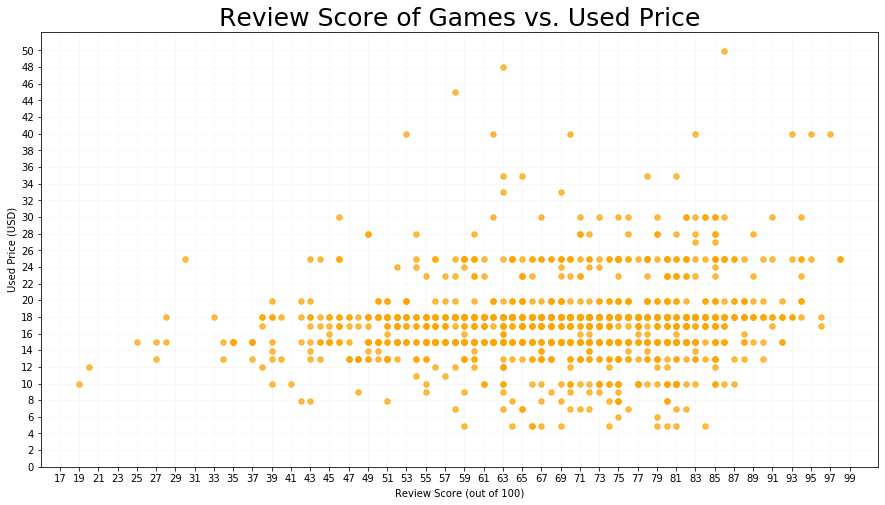

In [110]:
#print(dfDirtyGames["Metrics.Used Price"].describe())
#print(dfDirtyGames["Metrics.Review Score"].describe())

#note - using dfDirtyGames because I don't care about publisher for this case
# - technically, I could just do the ones with no publisher listed, but because this isn't relevant, 
maxScore = np.amax(dfDirtyGames["Metrics.Review Score"])
minScore = np.amin(dfDirtyGames["Metrics.Review Score"])
maxPrice = np.amax(dfDirtyGames["Metrics.Used Price"])

fig, ax = plt.subplots(figsize=(15,8))

ax.set_title("Review Score of Games vs. Used Price",fontsize=25)
ax.set_ylabel("Used Price (USD)")
ax.set_xlabel("Review Score (out of 100)")

xAxis = dfDirtyGames["Metrics.Review Score"]
yAxis = dfDirtyGames["Metrics.Used Price"]

ax.scatter(xAxis, yAxis, color='orange', s=30, alpha = 0.75)

plt.xticks(np.arange(minScore-2, 100, 2)) #put ticks in the x-axis at 5 instead of like 20 
plt.yticks(np.arange(0, maxPrice + 2, 2)) #put ticks in y-axis to see more 
ax.grid(alpha=0.1)

plt.show()

From ths plot, there initially appears no extremely obvious correlations to be drawn between review score and sales. This data shows no obvious trends about reviews as they relate to used price. To answer the original question, it does not appear there is any obvious relationships between these two variables. This suggests that perhaps a game's perception upon review and its used price do not in fact correlate in general. 


There are other factors (like year released) which could correspond to a game's used price, but given that this dataset only consists of six years of games, it seems like our time may be better spent elsewhere.


-- 





#### **Question:**  *Does game's review score correlate to length?* 

What about the length of a game? 
Unlike film and other forms of media, plenty of games do not actually have any set length. Players may finish them in different amounts of time depending on their skill level. Many games also have a single-player story campaign which, notably, varies in length depending on the style and direction of the game. This leaves us to ask the question: Is there any correllation between metacritic score and how long a game is?

To answer this, I will create a 2 similar plots, this time with the length on the x-axis and score on the y-axis. It should be noted that I'll be breaking down these into two cateogories - average story length and average playtime

Important distinctions to note: 

    - "Main Story Length" refers to the mean time of how long it takes a player to beat the story
    - "Total length" refers to the time which a game took to complete 100%, including achievements, etc. 


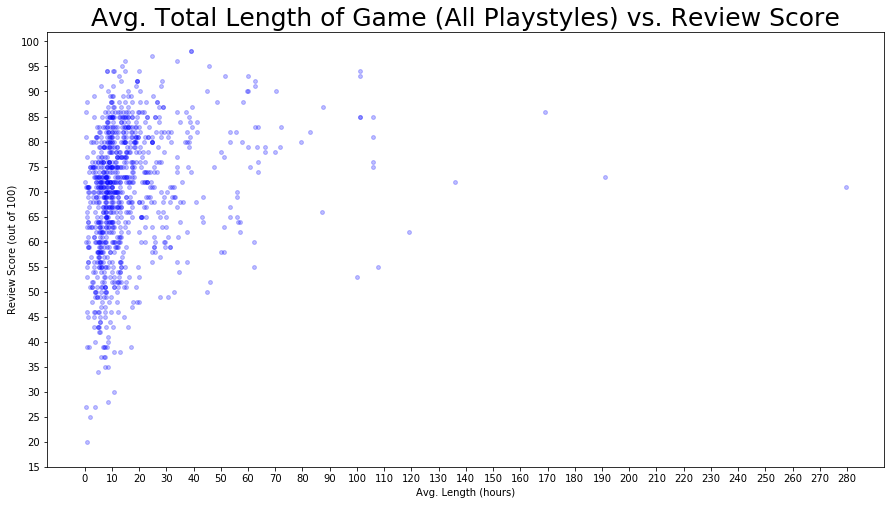

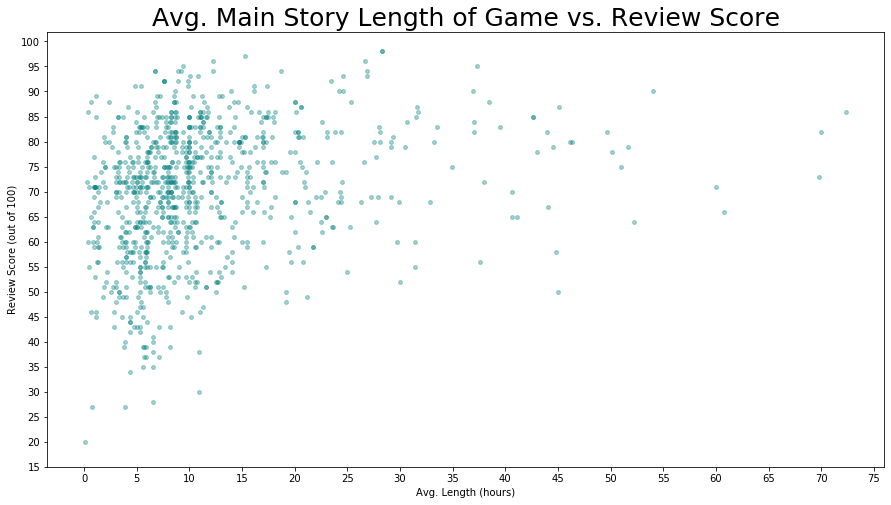

Mean total length of game (all playstyles): 13.7
Mean story length of game: 8.5


In [111]:
################
# Total Length:
################

#Filter out all of the data for length which is 0.0, since this is empty/missing data: 
dfCleanLengthGames =  dfDirtyGames[(dfDirtyGames['Length.All PlayStyles.Average'] != 0.0)]

maxScore = np.amax(dfDirtyGames["Metrics.Review Score"])
minScore = np.amin(dfDirtyGames["Metrics.Review Score"])
maxLength = np.amax(dfDirtyGames['Length.All PlayStyles.Average'])
minLength = np.amax(dfDirtyGames['Length.All PlayStyles.Average'])


fig, ax = plt.subplots(figsize=(15,8))

ax.set_title("Avg. Total Length of Game (All Playstyles) vs. Review Score",fontsize=25)
ax.set_ylabel("Review Score (out of 100)")
ax.set_xlabel("Avg. Length (hours)")

yAxis = dfCleanLengthGames["Metrics.Review Score"]
xAxis = dfCleanLengthGames['Length.All PlayStyles.Average']

ax.scatter(xAxis, yAxis, color='blue', s=15, alpha = 0.25)

plt.yticks(np.arange(minScore-4, 101, 5)) #put ticks in the x-axis at 5 instead of like 20 
plt.xticks(np.arange(0, maxLength + 5, 10)) #put ticks in y-axis to see more 

##################
#Second Plot; Main Story Length:
##################

#Filter out all of the data for length which is 0.0, since this is empty/missing data: 
dfCleanLengthGamesSt =  dfDirtyGames[(dfDirtyGames['Length.Main Story.Average'] != 0.0)]

maxScore = np.amax(dfDirtyGames["Metrics.Review Score"])
minScore = np.amin(dfDirtyGames["Metrics.Review Score"])
maxLength = np.amax(dfCleanLengthGamesSt['Length.Main Story.Average'])
minLength = np.amax(dfCleanLengthGamesSt['Length.Main Story.Average'])


fig, ax = plt.subplots(figsize=(15,8))

ax.set_title("Avg. Main Story Length of Game vs. Review Score",fontsize=25)
ax.set_ylabel("Review Score (out of 100)")
ax.set_xlabel("Avg. Length (hours)")

yAxis = dfCleanLengthGamesSt["Metrics.Review Score"]
xAxis = dfCleanLengthGamesSt['Length.Main Story.Average']

ax.scatter(xAxis, yAxis, color='teal', s=15, alpha = 0.35)

plt.yticks(np.arange(minScore-4, 101, 5)) #put ticks in the x-axis at 5 instead of like 20 
plt.xticks(np.arange(0, maxLength + 5, 5)) #put ticks in y-axis to see more 

plt.show()

meanLen = round(np.mean(dfDirtyGames['Length.All PlayStyles.Average']), 1)
meanStry = round(np.mean(dfDirtyGames['Length.Main Story.Average']), 1)
print("Mean total length of game (all playstyles):", meanLen)
print("Mean story length of game:", meanStry)

What's interesting to note is that regardless of playstyle or main story length, both of the data sets seem to have a few commonalities. Even though there is no obvious correlation or relationship between story length, playtime, and review score, there seems to be a few noteworthy takeaways from these visualizations of the data: 
 
 - **1. Games that score very low (roughly under 50) never seem to take longer than 15 to 20 hours to beat.** This suggests that if a game has a longer story campaign, it is likely that it will review somewhere above 50. Players generally think favorably about games with longer story campaigns or that take them longer to complete. 
 
 - **2. Games that score very high (90 or above) can vary in length, but usually don't take more than 100 hours to fully complete, or have a main story which is longer than 40 hours.** This suggests that perhaps there is a cutoff for the best games, meaning that a longer game doesn't always equal a better score. Notice how a lot of the data tends to be clustered in the 1-20hr mark all throughout, suggesting there exists plenty of games which are shorter (10-20 hours) yet score very well.
 
 - **3. Games that score very high (90 or above) don't seem to take less than 5 hours to complete**. Again, this points toward a balance in story length. A game that is too short to fully beat will leave audiences wanting more. They may not like the game if it is underdeveloped or feel upset if the game only takes a few hours to master. 
 
 
 
**What does this tell us about the relationship between how a game is reviewed and its length?** While generally, games tend to be around 14 hours hours to complete and 9 hours for the main story, The highest-reviewed games seem to be those which are not too short (5 or less hours) but generally not overly-long (more than 5-20 hours). However, plenty of games that are within this range and score wildly different, meaning that there are additional factors which are important to a game's success. 

--

#### **Question:**  *Does game's ESRB rating correlate to review score?* 

One of the important things to note is that a game's review has a large effect on the audience who plays the game. The ESRB rating system has been standard in games since 1994, and is a way for people to determine how appropriate the game's content is for a certain audience. Games rated E (*Everyone*) cater to everyone (or sometimes younger audiences) while *M*-rated (*Mature*) games cater to exclusively adults, usually with more mature content and themes. Because of the variety of skill levels, target audiences, and massive amount of people that play games, it would make sense that people would feel differently depending on the game's rating. 
But is there any correlation between a game's ESRB rating and how well it reviews? 


Before jumping into this, it's important to get a good sense of the games we're working with, to see how many games have a certain rating. I'll make a frequency histogram on ratings to get a better idea of how many games are rated what: 

- *Important side-note: Even though the ESRB now extends their ratings to E$_C$, E, E$^{10+}$, T, M, and A, the ESRB rating at the time of this dataset only consisted of E, T, and M*

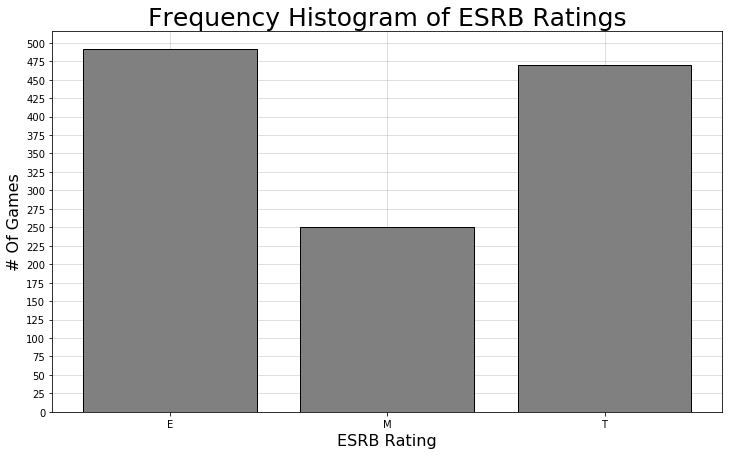

Number of categories: 3
Games Rated E:  491
Games Rated T:  470
Games Rated M:  251
Number of games total: 1212


In [112]:
#Works cited:
#I got a little help with histogram from string values from StackOverflow: https://stackoverflow.com/questions/28418988/how-to-make-a-histogram-from-a-list-of-strings-in-python

bins = np.arange(0, 525, step=25)


fig, ax = plt.subplots(figsize=(12,7))

labels, counts = np.unique(dfDirtyGames["Release.Rating"],return_counts=True)
ticks = range(len(counts))

ax.set_title("Frequency Histogram of ESRB Ratings",fontsize=25)
ax.set_ylabel("# Of Games", fontsize=16)
ax.set_xlabel("ESRB Rating", fontsize=16)


plt.bar(ticks,counts, align='center', fc="gray", ec="black")
plt.xticks(ticks, labels)
plt.yticks(bins)
ax.grid(alpha=0.5)
ax.set_axisbelow(True)

plt.show()

print("Number of categories:", dfDirtyGames["Release.Rating"].nunique())
#There are three categories of ratings: E, T, and M
print("Games Rated E: ",  (dfDirtyGames["Release.Rating"] =="E").sum())
print("Games Rated T: ",  (dfDirtyGames["Release.Rating"] =="T").sum())
print("Games Rated M: ",  (dfDirtyGames["Release.Rating"] =="M").sum())
print("Number of games total:", dfDirtyGames["Release.Rating"].count())

As we can see both visually and from the outputted data, there is a significant amount more of *E* and *T* games then there are *M* games. We'll need to keep this in mind when gathering correlation. How do we do this? Each category of *E*, *T*, and *M* will be given its own **distribution** of review score, so we can see the data of the games represented evenly and a bit more fairly. This will help identify any outliers or patterns more obviously. 

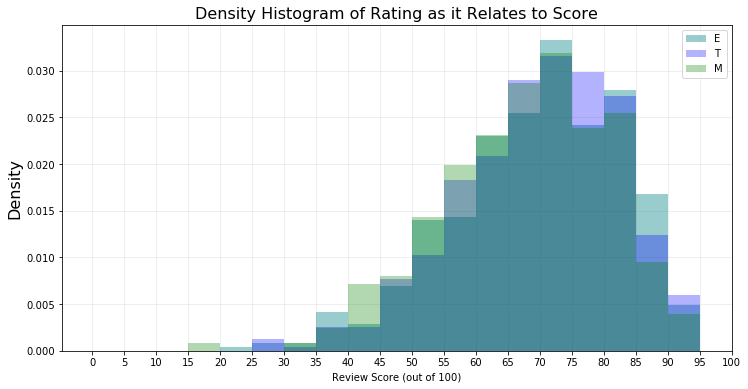

In [8]:
#Needs to be a DENSITY histogram, not just a normal 
fig, ax = plt.subplots(figsize=(12,6))
barwidth = 5

dfGamesRated_E = dfDirtyGames.loc[dfDirtyGames["Release.Rating"]=="E"]
dfGamesRated_T = dfDirtyGames.loc[dfDirtyGames["Release.Rating"]=="T"]
dfGamesRated_M = dfDirtyGames.loc[dfDirtyGames["Release.Rating"]=="M"]

my_bins = range(0,100,5)

dfGamesRated_E.hist(column="Metrics.Review Score", histtype='bar', ax=ax, facecolor="teal", width = barwidth, bins=my_bins, label="E", density=True, alpha=0.4)
dfGamesRated_T.hist(column="Metrics.Review Score",  histtype='bar', ax=ax, facecolor="blue",  width = barwidth, bins=my_bins, label="T", density=True, alpha=0.3)
dfGamesRated_M.hist(column="Metrics.Review Score",  histtype='bar', ax=ax, facecolor="green", width = barwidth, bins=my_bins, label="M",  density=True, alpha=0.3)


ax.set_title("Density Histogram of Rating as it Relates to Score", fontsize=16)

ax.set_xlabel("Review Score (out of 100)")
ax.set_ylabel("Density", fontsize=16)


plt.xticks(np.arange(0, 100 + 5, 5)) #put ticks in y-axis to see more 


ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend()

plt.show()

In [133]:
print("E-rated:")
print("  - Min Review Score: ", round(dfGamesRated_E["Metrics.Review Score"].min(), 1))
print("  - Mean Review Score: ", round(dfGamesRated_E["Metrics.Review Score"].mean(), 1))
print("  - Max Review Score: ", round(dfGamesRated_E["Metrics.Review Score"].max(), 1))
print("  - Std Deviation: ", round(dfGamesRated_E["Metrics.Review Score"].std(), 1))
print("\n")

print("T-rated:")
print("  - Min Review Score: ", round(dfGamesRated_T["Metrics.Review Score"].min(), 1))
print("  - Mean Review Score: ", round(dfGamesRated_T["Metrics.Review Score"].mean(), 1))
print("  - Max Review Score: ", round(dfGamesRated_T["Metrics.Review Score"].max(), 1))
print("  - Std Deviation: ", round(dfGamesRated_T["Metrics.Review Score"].std(), 1))
print("\n")

print("M-rated:")
print("  - Min Review Score: ", round(dfGamesRated_M["Metrics.Review Score"].min(), 1))
print("  - Mean Review Score: ", round(dfGamesRated_M["Metrics.Review Score"].mean(), 1))
print("  - Max Review Score: ", round(dfGamesRated_M["Metrics.Review Score"].max(), 1))
print("  - Std Deviation: ", round(dfGamesRated_M["Metrics.Review Score"].std(), 1))
print("\n")

E-rated:
  - Min Review Score:  20
  - Mean Review Score:  69.2
  - Max Review Score:  98
  - Std Deviation:  13.4


T-rated:
  - Min Review Score:  25
  - Mean Review Score:  69.3
  - Max Review Score:  96
  - Std Deviation:  12.5


M-rated:
  - Min Review Score:  19
  - Mean Review Score:  67.3
  - Max Review Score:  95
  - Std Deviation:  13.0




Interestingly, there is no obvious trends or outleirs here. Across the board, this means that there is no extreme variance in rating as it releates to rating. Most of the max and Min scores are pretty similar accross the board, as is the mean and standard deviationg. There's a bit of a spike in Teen games within the 75-80 range but aside from that nothing too abnormal. The games here all follow the same right-skewed bell-curve for review score. This is good! It means that games aren't going to be judged based on what target demographic they're for, and likely have an equal shot at being a great game regardless of ESRB rating or target audience!

-- 


### **Question:**  *Does the number of players able to play a game affect review score or used price?* 

From here, I'd like to do a quick take on multi vs. single player as it relates to review score. Theoretically, a reviewer or players experience with a multiplayer game can very wildy. With a single player game, many players are getting a similar experience, but with a multiplayer game, other players' interactions may drastically affect the way they few a game. But does this actually affect review score overall? For that, I'll create a density histogram of review score as it relates to single vs. multiplayer games


In [9]:
dfGamesSingleplayer = dfDirtyGames.loc[dfDirtyGames["Features.Max Players"]==1]
dfGamesMultiplayer = dfDirtyGames.loc[dfDirtyGames["Features.Max Players"]>1]

print("# of Single Player Games:", dfGamesSingleplayer["Features.Max Players"].count())
print("# of Multi Player Games:", dfGamesMultiplayer["Features.Max Players"].count())

# of Single Player Games: 834
# of Multi Player Games: 378


There are *far* more single player games than multiplayer games, so we'll need to take this into account when evaluating our samples

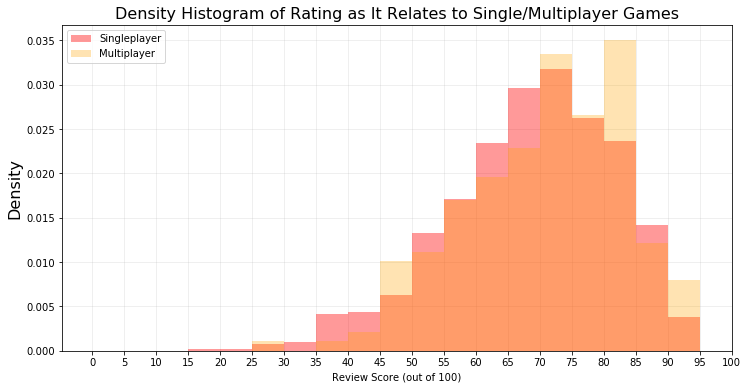

In [10]:
dfGamesSingleplayer = dfDirtyGames.loc[dfDirtyGames["Features.Max Players"]==1]
dfGamesMultiplayer = dfDirtyGames.loc[dfDirtyGames["Features.Max Players"]>1]


fig, ax = plt.subplots(figsize=(12,6))
barwidth = 5

my_bins = range(0,100,5)

dfGamesSingleplayer.hist(column="Metrics.Review Score", histtype='bar', ax=ax, facecolor="red", width = barwidth, bins=my_bins, label="Singleplayer", density=True, alpha=0.4)
dfGamesMultiplayer.hist(column="Metrics.Review Score",  histtype='bar', ax=ax, facecolor="orange",  width = barwidth, bins=my_bins, label="Multiplayer", density=True, alpha=0.3)

ax.set_title("Density Histogram of Rating as It Relates to Single/Multiplayer Games", fontsize=16)

ax.set_xlabel("Review Score (out of 100)")
ax.set_ylabel("Density", fontsize=16)


plt.xticks(np.arange(0, 100 + 5, 5)) #put ticks in y-axis to see more 


ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend()

plt.show()


In [122]:
spMean = dfGamesSingleplayer["Metrics.Review Score"].mean()
mpMean = dfGamesMultiplayer["Metrics.Review Score"].mean()
spMedian = dfGamesSingleplayer["Metrics.Review Score"].median()
mpMedian = dfGamesMultiplayer["Metrics.Review Score"].median()

print("Single Player games mean: ", spMean, "  median: ", spMedian)
print("Multi Player games mean: ", mpMean, "  median: ", mpMedian)


Single Player games mean:  68.21702637889689   median:  70.0
Multi Player games mean:  70.28342245989305   median:  73.0


**What these results mean:** 

Interestingly, the multi-player games tend to score a little bit higher in some parts relative to density. Even though the means + medians of both are pretty close to each other, and the overall distribution is too, the multiplayer has a big spike in the 80-85 range in the density histogram. Despite having less games  in this dataset, it's quite interesting to note such a massive spike at this point! More games within the multiplayer genre score within this range!

Perhaps this is an indication of multiplayer games generally being of a certain quality or reviewing positively? It is likely that generally well-crafted multiplayer experiences could review better than subjective story or single-player experiences that all players may not enjoy, or might not connect with in the same way as a multiplayer game. 


#### **Follow up:**  *What about co-op vs. single-player vs multiplayer?*

Again, we'll use the exact same process, except divide the data into 3 different sets instead of two. Single player, Co-op (2 player), or 3+ Players (Multiplayer)

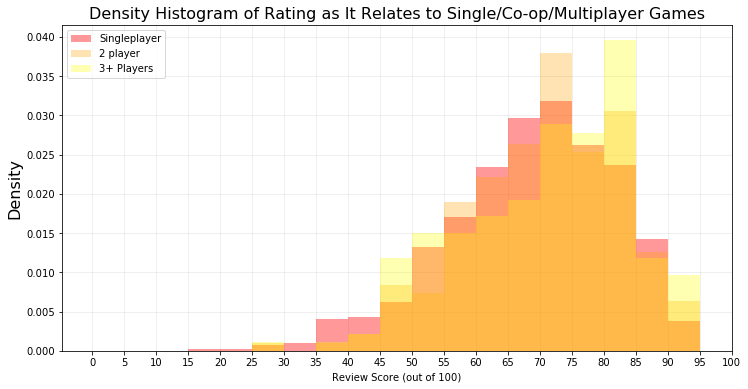

For reference: 
# of Single Player Games: 834
# of 2 Player Games: 191
# of 3+ Player Games: 187


In [12]:
dfGamesSingleplayer = dfDirtyGames.loc[dfDirtyGames["Features.Max Players"]==1]
dfGamesTwoplayer = dfDirtyGames.loc[dfDirtyGames["Features.Max Players"]==2]
dfGamesMultiplayer = dfDirtyGames.loc[dfDirtyGames["Features.Max Players"]>2]




fig, ax = plt.subplots(figsize=(12,6))
barwidth = 5

my_bins = range(0,100,5)

dfGamesSingleplayer.hist(column="Metrics.Review Score", histtype='bar', ax=ax, facecolor="red", width = barwidth, bins=my_bins, label="Singleplayer", density=True, alpha=0.4)
dfGamesTwoplayer.hist(column="Metrics.Review Score",  histtype='bar', ax=ax, facecolor="orange",  width = barwidth, bins=my_bins, label="2 player", density=True, alpha=0.3)
dfGamesMultiplayer.hist(column="Metrics.Review Score",  histtype='bar', ax=ax, facecolor="yellow",  width = barwidth, bins=my_bins, label="3+ Players", density=True, alpha=0.3)

ax.set_title("Density Histogram of Rating as It Relates to Single/Co-op/Multiplayer Games", fontsize=16)

ax.set_xlabel("Review Score (out of 100)")
ax.set_ylabel("Density", fontsize=16)


plt.xticks(np.arange(0, 100 + 5, 5)) #put ticks in y-axis to see more 


ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend()

plt.show()


##For reference:
print("For reference: ")
print("# of Single Player Games:", dfGamesSingleplayer["Features.Max Players"].count())
print("# of 2 Player Games:", dfGamesTwoplayer["Features.Max Players"].count())
print("# of 3+ Player Games:", dfGamesMultiplayer["Features.Max Players"].count())

Again, here we see this same trend of multi-player over single-player is still shown to be strong when comparing just 2-player co-op games (which score notably high in the 70-75 and 80-85 range) along with games that support 3+ players! It's interesting to note how much higher the overall distribution for this range of score for multiplayer games is! 

Yet again, this helps speak to the general trend that multiplayer games will likely score higher in the 80-85 range than most of the single-player games, the latter of which tend to have a bell-curve distribution! Perhaps multi-player games have a better shot of scoring very positively within this score range! 

 - **Important to note - there are singnificantly less multi-player games in this dataset than single player games. It should be noted that overall distribution may be affected by this slightly, however, we still felt it was interesting and worth discussing because of this massive spike*


___

## Review of Game Price and Game Length

**Examining How the Length of the Game Relates to its Price**


 *Exploring the Dollar per Hour of Gameplay Logic*
 
$\quad$ When it comes to games, some people consider "A Dollar Per Hour of Gameplay" (also sometimes referred to as the "Spoole's Rule") a good way to judge whether the amount content in a game is worth the price of the game. The theory says that a game can be defined as monetarily "good" if a player gets 1 hour of playtime at least for every US dollar spent on the game. For example, a player should expect 60 hours of gameplay from a sixty US dollar game. While this can be countered with the argument of "quality over quantity" it is still something that many people consider when purchasing a game.


$\quad$ Therefore, we wanted to examine the relationship between the price of the game and the average amount of hours spent on the game. For this analysis we will look at both the average length of all play styles (i.e. Playing leisurely, playing rushed, completing the game, speed runs, etc) and the average amout of time it takes the player to play through the game's main story line.


$\quad$ We compare the amount of time played to the re-sale value for a few reason. First of all, the dataset does not provide the games' release prices, but also, release prices tend to be the same across consoles regardless of length of the game, producer, ratings, etc.. On the other hand, we believed that a game's re-sale price would be more likely to be based off of the aforementioned traits. This along with the fact that the game has been out for a while in order to be resold, also more likely takes possible influences and price inflators (such as initial release hype, promotions, etc) out of the equation making the price hopefully closer to the price that the consumers think the game should be priced at.

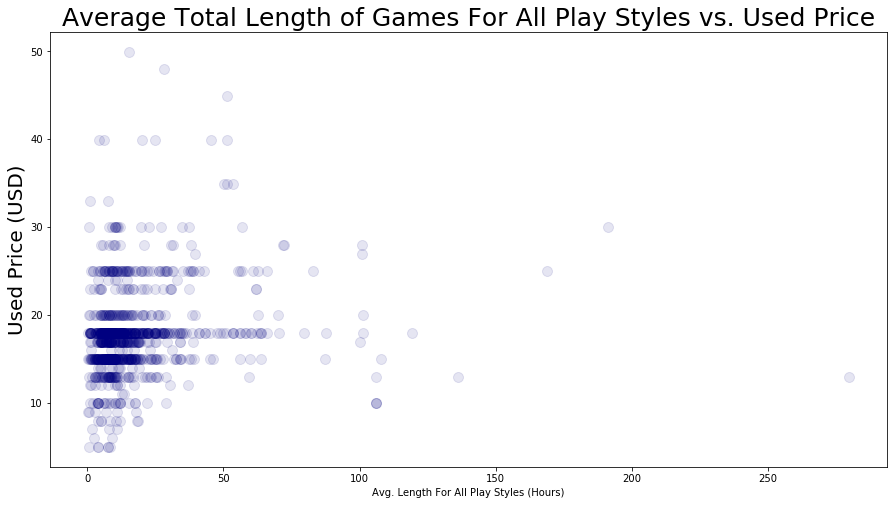

In [113]:
################
# IDKY all that is printing but -shrug-
################

xAxis = dfCleanLengthGames['Length.All PlayStyles.Average']
yAxis = dfDirtyGames["Metrics.Used Price"]


#Filter out all of the data for length which is 0.0, since this is empty/missing data: 
dfCleanLengthGames =  dfDirtyGames[(dfDirtyGames['Length.All PlayStyles.Average'] > 0)]

maxPrice = np.amax(dfCleanLengthGames["Metrics.Used Price"])
minPrice = np.amax(dfCleanLengthGames["Metrics.Used Price"])
maxLength = np.amax(dfCleanLengthGames['Length.All PlayStyles.Average'])
minLength = np.amax(dfCleanLengthGames['Length.All PlayStyles.Average'])


fig, ax = plt.subplots(figsize=(15,8))

ax.set_title("Average Total Length of Games For All Play Styles vs. Used Price",fontsize=25)
ax.set_ylabel("Used Price (USD)",fontsize=20)
ax.set_xlabel("Avg. Length For All Play Styles (Hours)",fontsize=10)

yAxis = dfCleanLengthGames["Metrics.Used Price"]
xAxis = dfCleanLengthGames['Length.All PlayStyles.Average']

ax.scatter(xAxis, yAxis, color='Navy', s=100, alpha = 0.1)


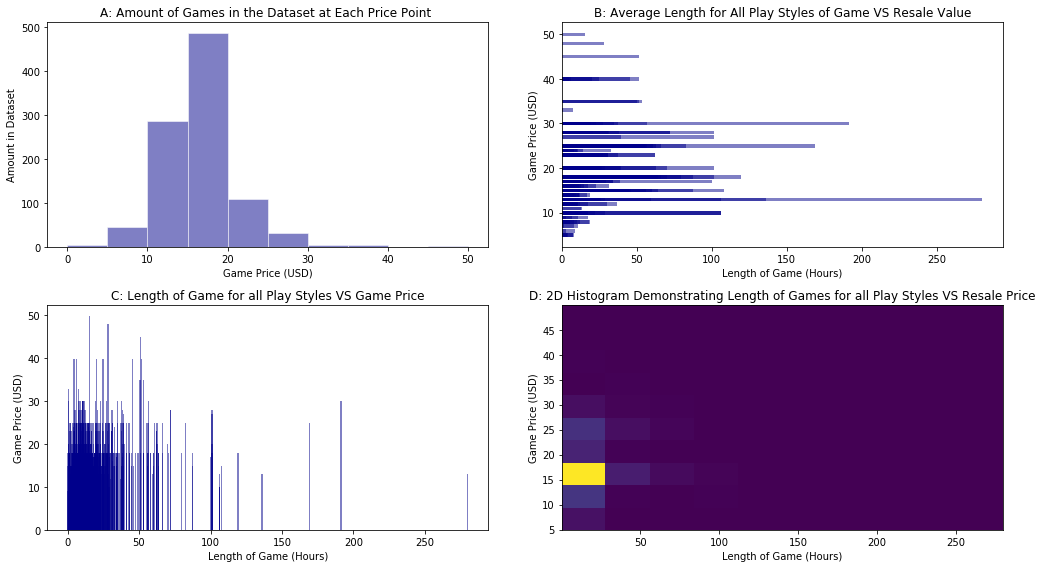

In [115]:
################
################

xAxis = dfCleanLengthGames['Length.All PlayStyles.Average']
yAxis =  dfCleanLengthGames["Metrics.Used Price"]


#Filter out all of the data for length which is 0.0, since this is empty/missing data: 
dfCleanLengthGames =  dfDirtyGames[(dfDirtyGames['Length.All PlayStyles.Average'] > 0)]

maxPrice = np.amax(dfCleanLengthGames["Metrics.Used Price"])
minPrice = np.amax(dfCleanLengthGames["Metrics.Used Price"])
maxLength = np.amax(dfCleanLengthGames['Length.All PlayStyles.Average'])
minLength = np.amax(dfCleanLengthGames['Length.All PlayStyles.Average'])

my_bins = range(0,55,5)

fig, axs = plt.subplots(2, 2, figsize=(15, 8))

axs[0, 0].hist(yAxis, color='DarkBlue', alpha = 0.5, histtype='bar', ec='white', bins = my_bins)
axs[0, 0].set_title('A: Amount of Games in the Dataset at Each Price Point ')
axs[0, 0].set_xlabel("Game Price (USD)")
axs[0, 0].set_ylabel("Amount in Dataset")

axs[0, 1].barh(yAxis, xAxis, color='DarkBlue', alpha = 0.5)
axs[0, 1].set_title('B: Average Length for All Play Styles of Game VS Resale Value')
axs[0, 1].set_ylabel("Game Price (USD)")
axs[0, 1].set_xlabel("Length of Game (Hours)")

axs[1, 0].bar(xAxis, yAxis, color='DarkBlue',  alpha = 0.5)
axs[1, 0].set_title('C: Length of Game for all Play Styles VS Game Price')
axs[1, 0].set_ylabel("Game Price (USD)")
axs[1, 0].set_xlabel("Length of Game (Hours)")

axs[1, 1].hist2d(xAxis, yAxis)
axs[1, 1].set_title('D: 2D Histogram Demonstrating Length of Games for all Play Styles VS Resale Price')
axs[1, 1].set_ylabel("Game Price (USD)")
axs[1, 1].set_xlabel("Length of Game (Hours)")

fig.tight_layout()
plt.show()


 
 - **Figure A)** This graph was included so that the reader could see where the majority of games in the dataset are priced for resale value. From looking at this graph, one can tell that most games in the set are resold for around 10 to 20 dollars. While this graph does not show a coorelation with the time of game play, it serves as a reference point and basis of comparison.
 
 - **Figure B)** This horizontal bar chart shows the relationship between the length of the game and the re-sale price of the game. As one can see, the majority of the games are valued at 20 USD or less and are at about 30 hours or less of game play. However, there are some outliers reaching over 250 hours played selling under 20 USD.
 
 - **Figure C)** This bar chart is the same as Figure B but is verticle and helps visualize how the majority of games are priced under 20 USD and have less than 50 hours of average gameplay for all play styles. 
 
 - **Figure D)** This 2D Histogram also aims to show where the majority of games are priced and how long the majority of those games are. From looking at this figure, one can tell that the majority of games are betweet 14 and 18 USD and have 25 hours or less of average gameplay for all styles.
 
 
*What does this tell us about the relationship between the length of a game and it's average play time??*

$\quad$ While one may assume that the longer amount of time one can play the game would lead to higher prices because of there being more content while shorter games would lead to cheaper prices due to less content, the data shows that this doesn't always hold true. For example, the highest priced games (priced over 30 USD) recorded only max out around 50-60 hours of gameplay while games that are cheaper (under 30 USD) sometimes have twice the amount of hours played. Further more, the games that reach over 250 hours of game play are under 15 USD. Excluding the short games (under 25 hours) which sell for under 10 USD, the higher priced games seem to have some of the shorter playtimes. While much of the data does seem to satisfy the "1 hour of game play per 1 dollar spent" rule, from this data set, it is clear that more expensive games do not necessarily have longer game play times and cheaper games do not always have less play time. 

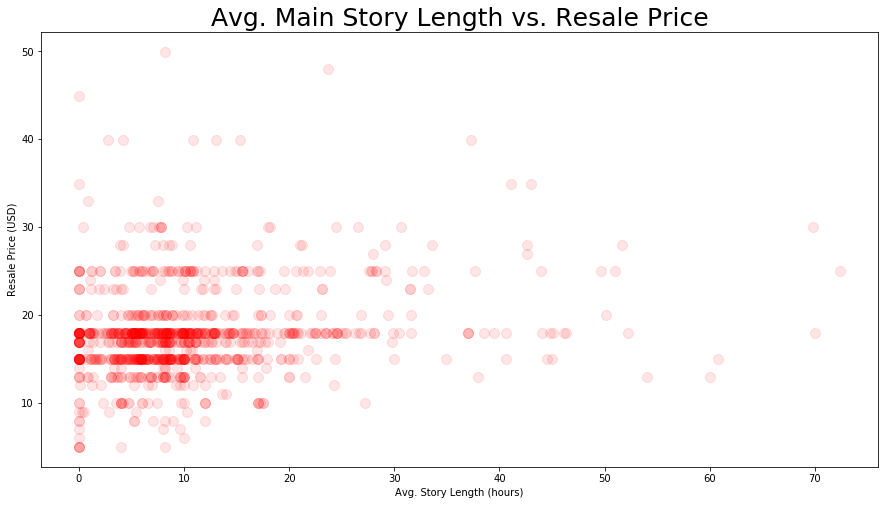

In [116]:


#Filter out all of the data for length which is 0.0, since this is empty/missing data: 
dfCleanLengthGamesSt =  dfDirtyGames[(dfDirtyGames['Length.Main Story.Average'] != 0.0)]

maxPrice = np.amax(dfCleanLengthGames["Metrics.Used Price"])
minPrice = np.amax(dfCleanLengthGames["Metrics.Used Price"])
maxLength = np.amax(dfCleanLengthGames['Length.Main Story.Average'])
minLength = np.amax(dfCleanLengthGames['Length.Main Story.Average'])


fig, ax = plt.subplots(figsize=(15,8))

ax.set_title("Avg. Main Story Length vs. Resale Price",fontsize=25)
ax.set_ylabel("Resale Price (USD)")
ax.set_xlabel("Avg. Story Length (hours)")

yAxis =  dfCleanLengthGames["Metrics.Used Price"]
xAxis = dfCleanLengthGames['Length.Main Story.Average']

ax.scatter(xAxis, yAxis, s=100, alpha=0.1, color='Red')


plt.show()


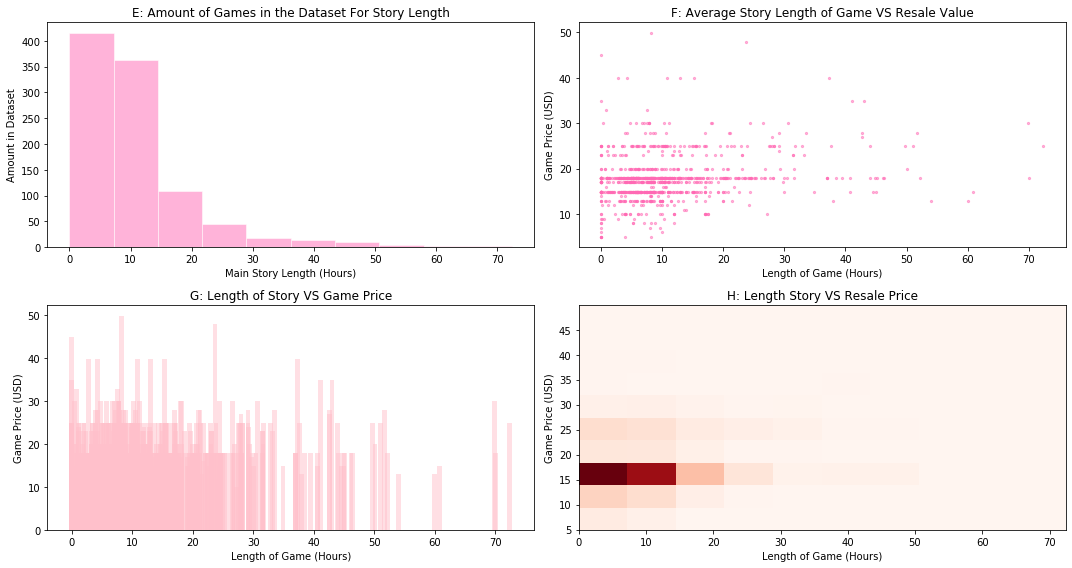

In [117]:
################
################
yAxis =  dfCleanLengthGames["Metrics.Used Price"]
xAxis = dfCleanLengthGames['Length.Main Story.Average']


#Filter out all of the data for length which is 0.0, since this is empty/missing data: 
dfCleanLengthGames =  dfDirtyGames[(dfDirtyGames['Length.All PlayStyles.Average'] > 0)]

maxPrice = np.amax(dfCleanLengthGames["Metrics.Used Price"])
minPrice = np.amax(dfCleanLengthGames["Metrics.Used Price"])
maxLength = np.amax(dfCleanLengthGames['Length.Main Story.Average'])
minLength = np.amax(dfCleanLengthGames['Length.Main Story.Average'])



fig, axs = plt.subplots(2, 2, figsize=(15, 8))

axs[0, 0].hist(xAxis, color='HotPink', alpha = 0.5, histtype='bar', ec='White')
axs[0, 0].set_title('E: Amount of Games in the Dataset For Story Length')
axs[0, 0].set_xlabel("Main Story Length (Hours)")
axs[0, 0].set_ylabel("Amount in Dataset")

axs[0, 1].scatter(xAxis, yAxis, color='HotPink', s=5, alpha = 0.5)
axs[0, 1].set_title('F: Average Story Length of Game VS Resale Value')
axs[0, 1].set_ylabel("Game Price (USD)")
axs[0, 1].set_xlabel("Length of Game (Hours)")

axs[1, 0].bar(xAxis, yAxis, color='Pink',  alpha = 0.5)
axs[1, 0].set_title('G: Length of Story VS Game Price')
axs[1, 0].set_ylabel("Game Price (USD)")
axs[1, 0].set_xlabel("Length of Game (Hours)")

axs[1, 1].hist2d(xAxis, yAxis, cmap=plt.cm.Reds)
axs[1, 1].set_title('H: Length Story VS Resale Price')
axs[1, 1].set_ylabel("Game Price (USD)")
axs[1, 1].set_xlabel("Length of Game (Hours)")


fig.tight_layout()
plt.show()


 
 - **Figure E)** This graph shows how common games of different story lengths were in the dataset. As one can see, as the length of the game's story increased, the amount of games with those lengths decreased. While there were far more shorter games produced. This may be because it takes more time and money to produce longer games while shorter games are easier to push out more often and may appeal to a wider range of audiences who don't want to commit as much time to a story. 
 
 - **Figure F)** This horizontal bar chart shows the relationship between the length of the game and the re-sale price of the game. As one can see, the majority of the games are valued at 20 USD or less and are at about 25 hours or less of game play. However, there are some outliers with a storyline of over 60 hours still under 30 dollars.
 
 - **Figure G)** This bar chart is similar to Figure C in the above dataset exploring game length for all play styles, however, here, there does seem to be more of a coorelation between length of a game and the re-sale price.
 
 - **Figure H)** This 2D Histogram also aims to show where the majority of games are priced and how long the majority of those games are. From looking at this figure, one can tell that the majority of games are betweet 14 and 18 USD and have 8 hours or less of game story length.
 
 
*What does this tell us about the relationship between the length of a game and it's Main Story Length??*

$\quad$ While, like the dataset exploring the relationship between average play times and a game's resale value, is similar to this one exploring a game's story length, in this dataset, a relationship between a game's story length and it's resale value is somewhat more apparent. As mentioned earlier, this may be due to storylines taking longer to produce, animate, storyboard for, etc. and may be more expensive for the company therefore making it more expensive when up for re-sale.

___

#### Probability and Takeaways: 



Now that we have all this data, we can actually make some pretty interseting claims with probablility using this! For example: 
    - If a game is multiplayer, it has an 35% chance of reviewing 80-85, whereas a single player has a ~23% chance of scoring the same!
    - Regardless of a game's rating, it has a roughly equal chance to score a 70-75 (33%) 
    - If a game 